In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.svm import SVC
import sklearn.datasets as datasets
from sklearn.model_selection import cross_val_score as cv
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = (8.0, 6.0)

from IPython.display import HTML

In [2]:
data = pd.read_json('data/data.json')

In [3]:
data.head(10)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA
5,premium,1300496400,117,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,1294421810,...,"[{'event_id': 1179983, 'cost': 8.0, 'availabil...",299,1268579110,1,,US,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY
6,premium,1297909800,28,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,1294425018,...,"[{'event_id': 1180179, 'cost': 22.63, 'availab...",706,1233437951,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD
7,premium,1296709200,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294427837,...,"[{'event_id': 1180391, 'cost': 14.0, 'availabi...",71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC
8,premium,1298185200,4388,4,US,USD,0.0,"<p style=""text-align: center;""><font face=""boo...",credosf.com,1294428122,...,"[{'event_id': 1180423, 'cost': 250.0, 'availab...",0,1294428121,3,465 California Street,US,37.792847,-122.402082,,
9,premium,1297314000,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294428286,...,"[{'event_id': 1180435, 'cost': 14.0, 'availabi...",71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [5]:
data.groupby('acct_type')['body_length'].describe()

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.0,1392.784897,2579.111431,0.0,108.00,570.0,1696.00,28872.0
fraudster_att,5.0,537.800000,690.199029,0.0,137.00,148.0,743.00,1661.0
fraudster_event,851.0,1574.211516,3965.861195,0.0,0.00,357.0,1650.50,54648.0
locked,54.0,3776.629630,5930.084791,0.0,780.00,1631.0,3250.00,27337.0
premium,12373.0,3813.358118,5771.834520,0.0,880.00,2129.0,4475.00,65535.0
spammer,1.0,6264.000000,NaN,6264.0,6264.00,6264.0,6264.00,6264.0
spammer_limited,218.0,5437.724771,5759.754770,0.0,1697.75,3901.5,6801.00,35442.0
spammer_noinvite,84.0,5471.916667,7950.444390,0.0,1596.00,3737.5,7255.50,65009.0
spammer_warn,144.0,4527.354167,5397.223426,0.0,1504.00,2898.5,6017.75,44518.0


In [6]:
data.groupby('acct_type')['sale_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,418.0,10.978469,26.493780,-1.0,1.00,2.5,9.00,331.0
fraudster_att,4.0,19.750000,15.217862,3.0,11.25,18.5,27.00,39.0
fraudster_event,753.0,15.843293,71.961735,-1094.0,1.00,4.0,10.00,980.0
locked,54.0,51.796296,81.512444,0.0,11.00,24.0,64.50,471.0
premium,12337.0,50.395477,53.426569,-143.0,20.00,35.0,63.00,848.0
spammer,1.0,23.000000,NaN,23.0,23.00,23.0,23.00,23.0
spammer_limited,217.0,39.552995,52.242386,0.0,14.00,28.0,48.00,591.0
spammer_noinvite,84.0,34.785714,57.258044,0.0,10.75,18.0,36.75,381.0
spammer_warn,144.0,44.812500,38.732717,0.0,20.00,31.5,62.00,271.0


In [7]:
data.groupby('acct_type')['channels'].describe()

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.0,5.384439,3.924580,0.0,0.00,6.0,8.00,13.0
fraudster_att,5.0,3.200000,2.949576,0.0,0.00,5.0,5.00,6.0
fraudster_event,851.0,3.520564,4.167718,0.0,0.00,0.0,6.00,13.0
locked,54.0,5.759259,3.731231,0.0,4.25,6.0,8.00,13.0
premium,12373.0,6.373717,3.790248,0.0,5.00,6.0,8.00,13.0
spammer,1.0,11.000000,NaN,11.0,11.00,11.0,11.00,11.0
spammer_limited,218.0,6.798165,3.320873,0.0,5.00,6.0,8.00,13.0
spammer_noinvite,84.0,7.345238,3.129702,0.0,5.00,8.0,11.00,13.0
spammer_warn,144.0,5.972222,3.815582,0.0,5.00,6.0,8.00,13.0


In [8]:
data.groupby('acct_type')['has_analytics'].describe()

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.0,0.002288,0.047836,0.0,0.0,0.0,0.0,1.0
fraudster_att,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
fraudster_event,851.0,0.003525,0.059304,0.0,0.0,0.0,0.0,1.0
locked,54.0,0.018519,0.136083,0.0,0.0,0.0,0.0,1.0
premium,12373.0,0.082033,0.274427,0.0,0.0,0.0,0.0,1.0
spammer,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
spammer_limited,218.0,0.059633,0.237351,0.0,0.0,0.0,0.0,1.0
spammer_noinvite,84.0,0.035714,0.186691,0.0,0.0,0.0,0.0,1.0
spammer_warn,144.0,0.069444,0.255096,0.0,0.0,0.0,0.0,1.0


In [9]:
data.groupby('acct_type')['gts'].describe()

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.0,2057.212769,5287.238564,0.00,122.4400,500.000,1320.7000,61242.68
fraudster_att,5.0,2355.034000,3225.384789,0.00,0.0000,69.240,5211.0300,6494.90
fraudster_event,851.0,1833.634571,4279.680190,0.00,0.0000,267.850,1712.7750,56469.26
locked,54.0,1463.982407,4501.795226,11.54,162.0025,394.115,1083.6825,32502.94
premium,12373.0,2531.424853,9639.000790,0.00,126.2900,445.000,1575.4600,306293.93
spammer,1.0,189.230000,NaN,189.23,189.2300,189.230,189.2300,189.23
spammer_limited,218.0,1703.442018,6845.267999,5.00,120.0000,377.850,1005.8575,69281.70
spammer_noinvite,84.0,641.970476,1901.132449,10.00,65.4600,187.050,588.6575,16921.01
spammer_warn,144.0,1865.695208,4891.366806,10.00,171.4175,420.250,1261.8400,40730.72


In [10]:
data.groupby('acct_type')['user_age'].describe()

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.0,171.519451,466.808884,0.0,0.00,0.0,48.00,2207.0
fraudster_att,5.0,338.000000,447.982701,0.0,0.00,33.0,823.00,834.0
fraudster_event,851.0,42.354877,154.640870,0.0,0.00,0.0,12.00,1053.0
locked,54.0,324.425926,355.635419,0.0,35.75,188.0,544.75,1164.0
premium,12373.0,396.897842,416.176059,0.0,33.00,284.0,630.00,3794.0
spammer,1.0,728.000000,NaN,728.0,728.00,728.0,728.00,728.0
spammer_limited,218.0,546.986239,449.290906,0.0,205.25,451.0,784.25,2297.0
spammer_noinvite,84.0,649.095238,434.812094,0.0,289.50,623.0,976.25,1701.0
spammer_warn,144.0,631.541667,467.488392,0.0,230.50,541.0,1053.00,1870.0


In [11]:
# instantiate pymongo

mc = pymongo.MongoClient(host="localhost", port=27017)

In [12]:
db = mc['event_shiny']

In [13]:
trans_coll = db['transactions']

In [14]:
with open('data/data.json') as f:
    file_data = json.load(f)


In [15]:
trans_coll.insert_many(file_data)

In [16]:
result = _

In [17]:
result.acknowledged

True

In [18]:
trans_coll.find_one()

{'_id': ObjectId('5c9116e1ed47eafbf9adeed7'),
 'acct_type': 'fraudster_event',
 'approx_payout_date': 1266062400,
 'body_length': 3852,
 'channels': 5,
 'country': 'US',
 'currency': 'USD',
 'delivery_method': 0.0,
 'description': '<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p

In [19]:
cursor = trans_coll.find()
from collections import Counter
for doc in cursor:
    if 'previous_payouts' in doc and type(doc['previous_payouts']) is list:
        previous_payouts_count = len(doc['previous_payouts'])
    else:
        previous_payouts_count = 0
    _id = doc['_id']
    trans_coll.update_one(
        {'_id': _id},
        {'$set': {'previous_payouts_count': previous_payouts_count}})

In [20]:
cursor = trans_coll.find()

In [21]:
cursor[0]

{'_id': ObjectId('5c9116e1ed47eafbf9adeed7'),
 'acct_type': 'fraudster_event',
 'approx_payout_date': 1266062400,
 'body_length': 3852,
 'channels': 5,
 'country': 'US',
 'currency': 'USD',
 'delivery_method': 0.0,
 'description': '<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p

In [22]:
cursor.count()

/Users/jordanweil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


43011

In [23]:
# 'fraudster' count

trans_coll.find({'acct_type': 'fraudster'}).count()

/Users/jordanweil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1311

In [24]:
trans_coll.count_documents({})

43011

In [25]:
# 'fraudster_event' count

trans_coll.find({'acct_type': 'fraudster_event'}).count()

/Users/jordanweil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


2553

In [26]:
# 'fraudster_att' count

trans_coll.find({'acct_type': 'fraudster_att'}).count()

/Users/jordanweil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


15

In [27]:
trans_coll.distinct('acct_type')

['fraudster_event',
 'premium',
 'spammer_warn',
 'fraudster',
 'spammer_limited',
 'spammer_noinvite',
 'locked',
 'tos_lock',
 'tos_warn',
 'fraudster_att',
 'spammer_web',
 'spammer']

In [50]:
from pymongo import MongoClient
fraud_df = pd.DataFrame(list(cursor))

In [52]:
fraud_df.head()

""


In [30]:
prev_trans = pd.DataFrame()

In [31]:
prev_trans['acct_type'] = fraud_df['acct_type']

In [32]:
prev_trans['previous_trans'] = fraud_df['previous_payouts_count']


In [33]:
prev_trans.head()

,acct_type,previous_trans
0,fraudster_event,0
1,premium,49
2,premium,36
3,premium,21
4,premium,49


In [34]:
fraudsters = prev_trans[prev_trans['acct_type'] == 'fraudster']
premium = prev_trans[prev_trans['acct_type'] == 'premium']
spammer_warn = prev_trans[prev_trans['acct_type'] == 'spammer_warn']
fraudster_event = prev_trans[prev_trans['acct_type'] == 'fraudster_event']

In [35]:
np.mean(fraudsters['previous_trans'])

4.482837528604119

In [36]:
np.mean(premium['previous_trans'])

84.62660632021337

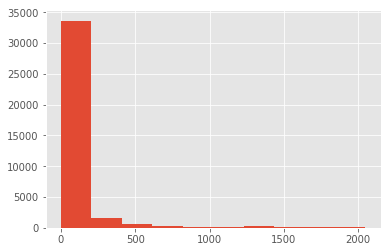

In [37]:
_ = plt.hist(premium['previous_trans'])

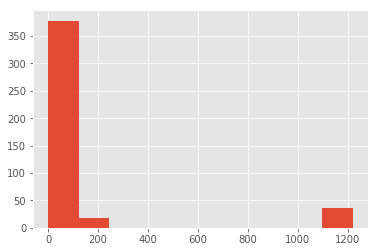

In [38]:
_ = plt.hist(spammer_warn['previous_trans'])

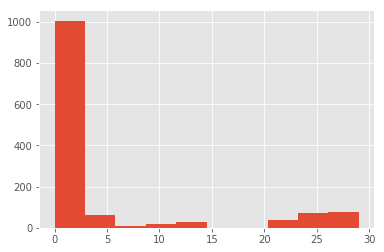

In [39]:
_ = plt.hist(fraudsters['previous_trans'])

In [40]:
trans_coll.distinct('acct_type')

['fraudster_event',
 'premium',
 'spammer_warn',
 'fraudster',
 'spammer_limited',
 'spammer_noinvite',
 'locked',
 'tos_lock',
 'tos_warn',
 'fraudster_att',
 'spammer_web',
 'spammer']

In [41]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43011 entries, 0 to 43010
Data columns (total 46 columns):
_id                       43011 non-null object
acct_type                 43011 non-null object
approx_payout_date        43011 non-null int64
body_length               43011 non-null int64
channels                  43011 non-null int64
country                   42768 non-null object
currency                  43011 non-null object
delivery_method           42963 non-null float64
description               43011 non-null object
email_domain              43011 non-null object
event_created             43011 non-null int64
event_end                 43011 non-null int64
event_published           42714 non-null float64
event_start               43011 non-null int64
fb_published              43011 non-null int64
gts                       43011 non-null float64
has_analytics             43011 non-null int64
has_header                26784 non-null float64
has_logo                  43011

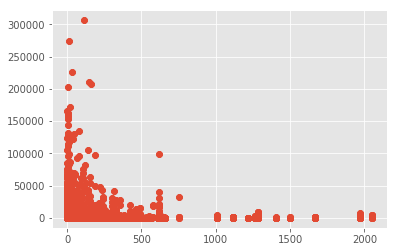

In [42]:
_ = plt.scatter(fraud_df['previous_payouts_count'],fraud_df['gts'])

In [43]:
feature_union = pd.DataFrame()

In [44]:
# create label function: premium accounts = 0, 
# actual fraud = 1, questionable accounts = 2
# returns a list of labels

def create_label(lst):
    label_list = []
    for item in lst:
        if item == 'premium':
            label_list.append(0)
        elif item in ['fraudster','fraudster_event', 'fraudster_att']:
            label_list.append(1)
        else:
            label_list.append(2)
    return label_list



In [45]:
acct_list = data['acct_type'].values

In [46]:
acct_list

array(['fraudster_event', 'premium', 'premium', ..., 'premium',
       'tos_warn', 'fraudster_event'], dtype=object)

In [47]:
len(acct_list)

14337

In [54]:
fraud_df

""


In [49]:
fraud_eda['previous_trans'] = fraud_df['previous_payouts_count']

NameError: name 'fraud_eda' is not defined

In [ ]:
len(label_list)

In [ ]:
feature_union = pd.DataFrame()

In [53]:
feature_union['prev_transactions'] = fraud_df['previous_payouts_count']

KeyError: 'previous_payouts_count'

In [ ]:
feature_union['user_age'] = fraud_df['user_age']

In [ ]:
feature_union['body_length'] = fraud_df['body_length']

In [ ]:
feature_union['has_analytics'] = fraud_df['has_analytics']

In [ ]:
feature_union['sale_duration'] = fraud_df['sale_duration']

In [ ]:
feature_union.head()

In [ ]:
feature_union['sale_duration'] = feature_union['sale_duration'].fillna(feature_union['sale_duration'].mean())

In [ ]:
feature_union['sale_duration'].isnull().values.any()

In [ ]:
feature_union.info()

In [ ]:
len(label_list)

In [ ]:
# create X and y objects

y = np.array(label_list)
X = feature_union.values



In [ ]:
# set up train / test split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1988) 

In [ ]:
# instantiate random forest model

clf = RandomForestClassifier(n_estimators=10, random_state=1988)

In [ ]:
len(X_train)

In [ ]:
# fit the model

clf.fit(X_train, y_train)

## Boosting Model

In [ ]:
X